<a href="https://colab.research.google.com/github/Ramcharan77/2216103_aiml_bootcamp_ml_concepts/blob/main/kmeans_Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df=df.drop("CustomerID",axis=1)

In [5]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

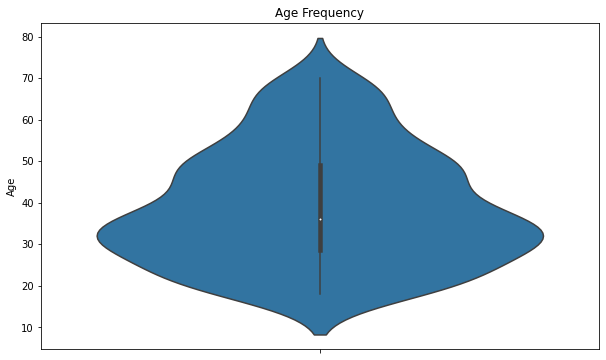

In [6]:
#visualize the distribution
#violin plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Age Frequency')
sns.violinplot(y=df["Age"])
plt.show()

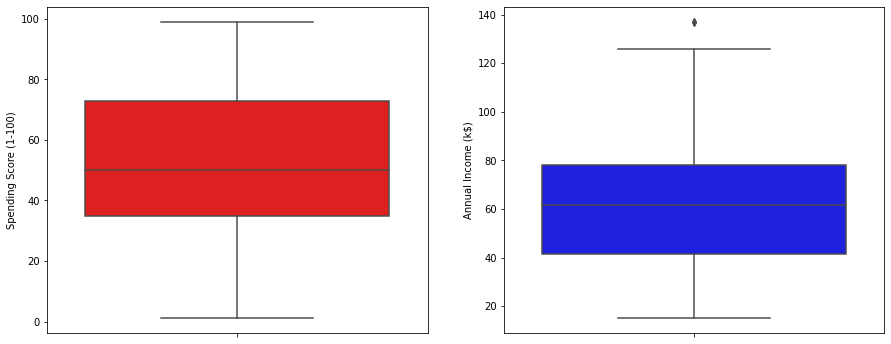

In [7]:
#boxplot 
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"],color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"],color="blue")
plt.show()

In [8]:
'''genders=df.Gender.value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index,y=genders.values) #index(female,male)-x,
plt.show()'''

'genders=df.Gender.value_counts()\nplt.figure(figsize=(10,4))\nsns.barplot(x=genders.index,y=genders.values) #index(female,male)-x,\nplt.show()'

In [9]:
df["Age"]

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64

In [10]:
df['Age'][(df["Age"]>=18) & (df["Age"]<=25)] 

0      19
1      21
2      20
3      23
5      22
7      23
13     24
15     22
17     20
21     25
29     23
31     21
33     18
35     21
39     20
41     24
45     24
61     19
65     18
68     19
78     23
84     21
87     22
91     18
95     24
99     20
100    23
105    21
111    19
113    19
114    18
115    19
124    23
132    25
134    20
138    19
144    25
162    19
Name: Age, dtype: int64

In [11]:
#make a bar plot to check the no.of customers in each age group
age18_25=df['Age'][(df["Age"]>=18) & (df["Age"]<=25)] 
age26_35=df['Age'][(df["Age"]>=26) & (df["Age"]<=35)] 
age36_45=df['Age'][(df["Age"]>=36) & (df["Age"]<=45)] 
age46_55=df['Age'][(df["Age"]>=46) & (df["Age"]<=55)] 
age55above=df['Age'][(df["Age"]>=55) ] 

Text(0, 0.5, 'no.of customers')

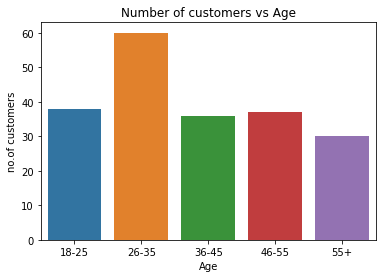

In [12]:
x=["18-25","26-35","36-45","46-55","55+"]
y=[len(age18_25),len(age26_35),len(age36_45),len(age46_55),len(age55above)]
plt.figure(figsize=(6,4))
sns.barplot(x=x,y=y)
plt.title("Number of customers vs Age")
plt.xlabel("Age")
plt.ylabel("no.of customers")

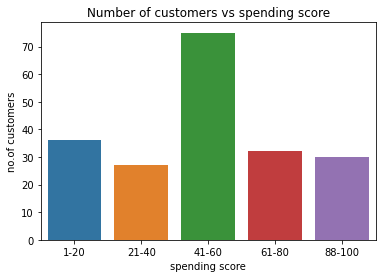

In [13]:
ss1_20=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=1) & (df["Spending Score (1-100)"]<=20)] 
ss21_40=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=21) & (df["Spending Score (1-100)"]<=40)]
ss41_60=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=41) & (df["Spending Score (1-100)"]<=60)]
ss61_80=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=61) & (df["Spending Score (1-100)"]<=80)]
ss81_100=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=81) & (df["Spending Score (1-100)"]<=100)]
x=["1-20","21-40","41-60","61-80","88-100"]
y=[len(ss1_20),len(ss21_40),len(ss41_60),len(ss61_80),len(ss81_100)]
plt.figure(figsize=(6,4))
sns.barplot(x=x,y=y)
plt.title("Number of customers vs spending score")
plt.xlabel("spending score")
plt.ylabel("no.of customers")
plt.show()

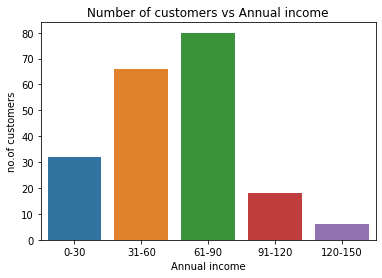

In [14]:
in0_30=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=0) & (df["Annual Income (k$)"]<=30)] 
in31_60=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=31) & (df["Annual Income (k$)"]<=60)]
in61_90=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=61) & (df["Annual Income (k$)"]<=90)]
in91_120=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=91) & (df["Annual Income (k$)"]<=120)]
in120_150=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=120) & (df["Annual Income (k$)"]<=150)]
x=["0-30","31-60","61-90","91-120","120-150"]
y=[len(in0_30),len(in31_60),len(in61_90),len(in91_120),len(in120_150)]
plt.figure(figsize=(6,4))
sns.barplot(x=x,y=y)
plt.title("Number of customers vs Annual income")
plt.xlabel("Annual income")
plt.ylabel("no.of customers")
plt.show()

In [15]:
df.iloc[:,-3:]

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [16]:
#unsupervised
#training the model
from sklearn.cluster import KMeans 
km = KMeans(n_clusters=2)
clusters=km.fit_predict(df.iloc[:,-3:])

In [17]:
df["label"]=clusters
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,Male,19,15,39,0
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,1
4,Female,31,17,40,0
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,0
197,Male,32,126,74,1
198,Male,32,137,18,0


[270030.15499999997, 181412.2575757576, 106377.16981007869, 73704.62903948833, 44465.344336822585, 37458.8628349911, 30276.272591900863, 25030.544976862217, 21950.228731992567, 19652.074009194937]


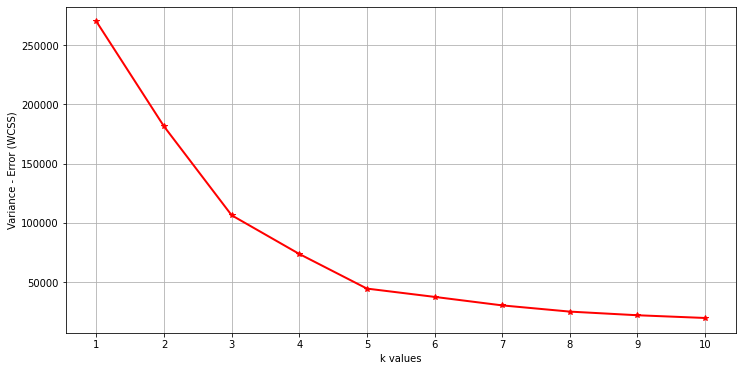

In [18]:
#Elbow point - To find the optimal k value
import numpy as np
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(df.iloc[:,-3:])
  wcss.append(kmeans.inertia_)

print(wcss)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="*")
plt.xlabel("k values")
plt.xticks(np.arange(1,11,1))
plt.ylabel("Variance - Error (WCSS)")
plt.show()

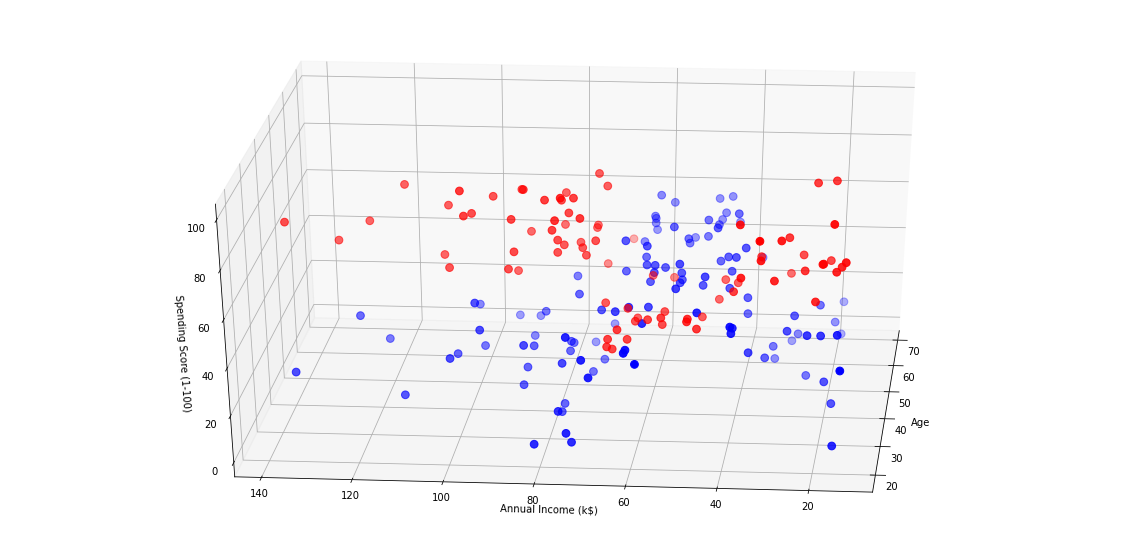

In [19]:
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

 

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [20]:
#unsupervised
#training the model
from sklearn.cluster import KMeans 
km = KMeans(n_clusters=5)
clusters=km.fit_predict(df.iloc[:,-3:])

In [21]:
df["label"]=clusters
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,Male,19,15,39,2
1,Male,21,15,81,0
2,Female,20,16,6,2
3,Female,23,16,77,0
4,Female,31,17,40,2
...,...,...,...,...,...
195,Female,35,120,79,4
196,Female,45,126,28,3
197,Male,32,126,74,4
198,Male,32,137,18,3


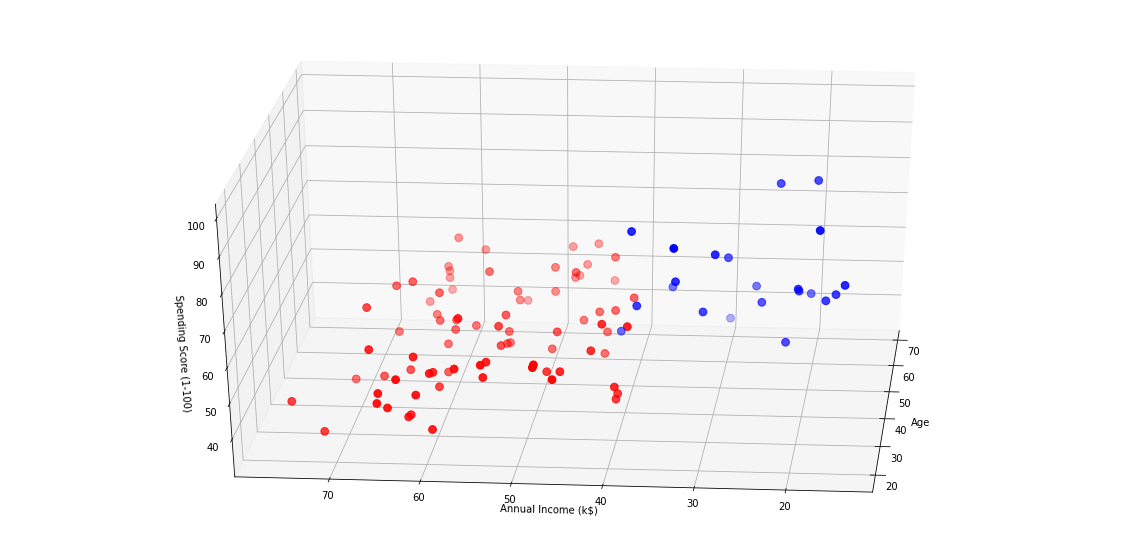

In [22]:
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

 

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [24]:
#User -   Predicting the Cluster of new customer - membership card
age = int(input("Enter Age:"))
anual_income = int(input("Enter Annual Income of customer: "))
spend_score = int(input("Enter Spending Score:"))
res_cluster = km.predict([[age,anual_income,spend_score]])

Enter Age:56
Enter Annual Income of customer: 800000
Enter Spending Score:999


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


In [25]:
print("new Customer belongs to Cluster: ",res_cluster[0])

new Customer belongs to Cluster:  4
